In [213]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [214]:
import csv, glob, os, sys, numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy import NaN, Inf, arange, isscalar, asarray, array
plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

#find all the files in the designated folder
##############################################################################
filepath = 'C:\\Users\\a6q\\Desktop\\jason dugger samples\\2017-10-09 CV under RH\\RH labelled/*'
##############################################################################
folder = glob.glob(filepath)
print("\n".join(list(folder))) #print name of each file imported

C:\Users\a6q\Desktop\jason dugger samples\2017-10-09 CV under RH\RH labelled\00
C:\Users\a6q\Desktop\jason dugger samples\2017-10-09 CV under RH\RH labelled\05
C:\Users\a6q\Desktop\jason dugger samples\2017-10-09 CV under RH\RH labelled\20
C:\Users\a6q\Desktop\jason dugger samples\2017-10-09 CV under RH\RH labelled\40
C:\Users\a6q\Desktop\jason dugger samples\2017-10-09 CV under RH\RH labelled\60
C:\Users\a6q\Desktop\jason dugger samples\2017-10-09 CV under RH\RH labelled\95


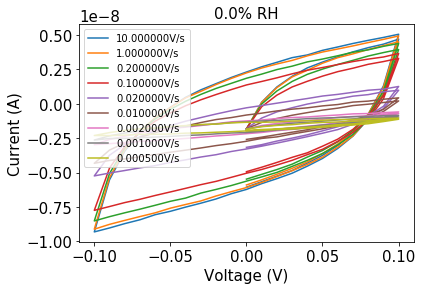

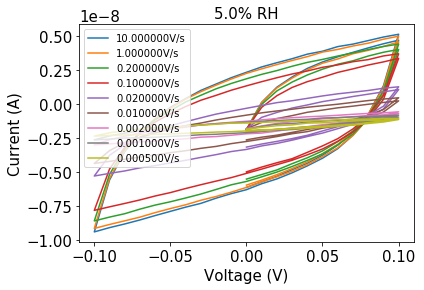

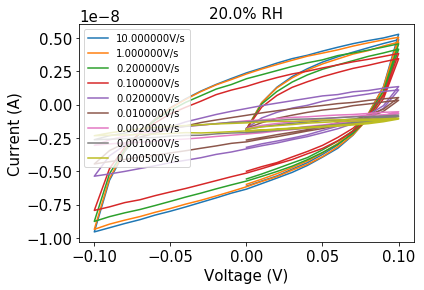

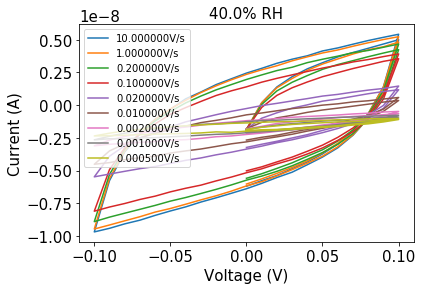

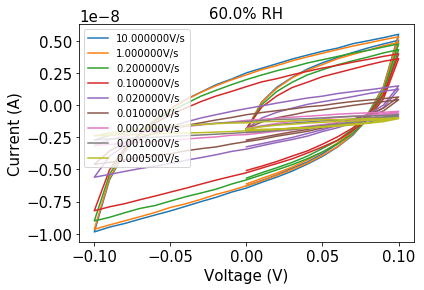

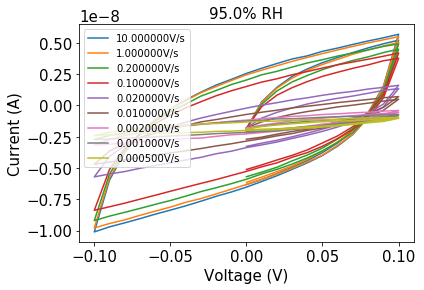

RH values:
[  0.   5.  20.  40.  60.  95.]
scan rates:
[  1.00000000e+01   1.00000000e+00   2.00000000e-01   1.00000000e-01
   2.00000000e-02   1.00000000e-02   2.00000000e-03   1.00000000e-03
   5.00000000e-04]


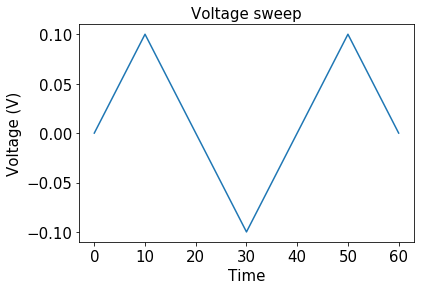

In [220]:
RHvalues = np.array([]) #get Rh values from file titles
for i in range(len(folder)):
    RHvalues = np.append(RHvalues, os.path.basename(folder[i]).split('_')[0]).astype(float)

v = np.array(pd.read_csv(folder[0], sep='\t')['V']) #get array of measured voltages

columns_to_drop = [0] #columns to drop from each dataframe - CHANGE THIS DEPENDING ON DATA!!!

for i in range(len(folder)): #loop over each file in folder
    alldata = pd.read_csv(folder[i], sep='\t') #read in data from each file
    data = alldata.drop(alldata.columns[columns_to_drop], axis=1) #drop voltage column
    
    scan_rates = np.array([]) #get list of scan rates
    for name in list(data):
        scan_rates = np.append(scan_rates, name.split('V')[0]).astype(float)
        
    for column in data: plt.plot(v, data[column], label=column) #plot data
    plt.legend(); plt.title(format(RHvalues[i]) + '% RH', fontsize=15)
    plt.xlabel('Voltage (V)', fontsize=15); plt.ylabel('Current (A)', fontsize=15)
    plt.show()
    
print('RH values:')   
print(RHvalues)
print('scan rates:')
print(scan_rates)

plt.plot(arange(len(v)), v); plt.title('Voltage sweep', fontsize=15)
plt.xlabel('Time', fontsize=15); plt.ylabel('Voltage (V)', fontsize=15)
plt.show()

In [199]:
max_currents = np.array([])
min_currents = np.array([])

for file in range(len(folder)): #loop over each file in folder
    alldata = pd.read_csv(folder[file], sep='\t') #read in data from each file
    data = alldata.drop(alldata.columns[columns_to_drop], axis=1) #drop voltage column
    
    for column in data:
        max_currents = np.append(max_currents, np.max(np.array(data[column])))
        min_currents = np.append(min_currents, np.min(np.array(data[column])))



In [202]:

plt.plot(scan_rates,max_currents)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (7, 9)

In [221]:
np.ones((2,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [203]:
RHvalues = RHvalues

['0', '0', '20', '40', '5', '60', '95']

In [131]:
#currents[:,0,0] = humidity,currents[0,:,0] = sweeprates, currents[0,0,:] = currents
print(np.shape(currents))
print(len(currents[:,0,0]))

(7, 9, 61)
7


(61, 9)

In [115]:
data.as_matrix()

array([[ -1.85651450e-09,  -1.84593341e-09,  -1.85701676e-09,
         -1.83535476e-09,  -1.79707937e-09,  -1.85197746e-09,
         -1.80211734e-09,  -1.88169014e-09,  -1.83082727e-09],
       [  2.05354900e-10,   1.88232596e-10,   4.26826352e-11,
         -1.35098821e-10,  -9.97819605e-10,  -1.31208311e-09,
         -1.56843272e-09,  -1.66915881e-09,  -1.66966485e-09],
       [  1.36014033e-09,   1.30273226e-09,   1.09374676e-09,
          7.11001702e-10,  -5.43038725e-10,  -1.00537334e-09,
         -1.40374223e-09,  -1.54677515e-09,  -1.57850755e-09],
       [  2.14723572e-09,   2.04601580e-09,   1.76300452e-09,
          1.29165345e-09,  -2.44889664e-10,  -8.02911848e-10,
         -1.28538913e-09,  -1.42993462e-09,  -1.44756584e-09],
       [  2.77217826e-09,   2.65282929e-09,   2.24644081e-09,
          1.75998227e-09,   8.93962682e-12,  -5.27426325e-10,
         -1.17912458e-09,  -1.30906219e-09,  -1.38058032e-09],
       [  3.21482641e-09,   3.10857029e-09,   2.71426548e-09,
   

In [ ]:
#OLD VERSION IN CELLS BELOW

In [175]:
import csv, glob, os, sys, numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy import NaN, Inf, arange, isscalar, asarray, array
plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

file_name = 'NEWTEST'
df1 = pd.read_csv(file_name, delimiter = '\t')# header=0, error_bad_lines=False, sep='\s+') #read in file
#print(df)

In [176]:
# Plot data
v = np.array(df1['V']) #get values for voltages
df = df1.drop(df1.columns[[0, 1]], axis=1) #drop first 2 columns: voltages, and 1st current sweep

# Merge similar columns to check standard deviation / reproducibility
repeat_sweeps = 3 #number of sweeps measured at each sweep rate
######################################################################
dfsd = df.groupby(np.arange(len(df.columns))//repeat_sweeps, axis=1).std() #st.dev. of every nth column
dfmean = df.groupby(np.arange(len(df.columns))//repeat_sweeps, axis=1).mean() #average to every nth column  
print(list(df)) #print list of column names to rename

['10.000000E-3mV/s.1', '10.000000E-3mV/s.2', '10.000000E-3mV/s.3', '1.000000E-3mV/s', '1.000000E-3mV/s.1', '1.000000E-3mV/s.2', '100.000000E-6mV/s', '100.000000E-6mV/s.1', '100.000000E-6mV/s.2', '10.000000E-6mV/s', '10.000000E-6mV/s.1', '10.000000E-6mV/s.2', '1.000000E-6mV/s', '1.000000E-6mV/s.1', '1.000000E-6mV/s.2']


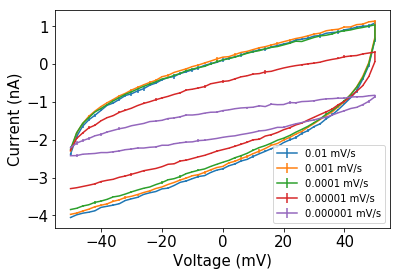

In [203]:
# rename columns to sweep rate
dfmean.columns =  ['0.01', '0.001', '0.0001', '0.00001', '0.000001']

for i in range(len(dfmean.columns)): #plot sweeps with st.dev. error bars
    plt.errorbar(v*1e3, dfmean.iloc[:,i]*1e9, yerr=dfsd.iloc[:,i]*1e9, label=list(dfmean)[i] + ' mV/s')
plt.ylabel('Current (nA)', fontsize=15); plt.xlabel('Voltage (mV)', fontsize=15)
plt.legend(); plt.show()

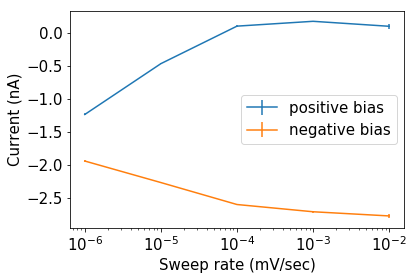

In [256]:
# plot current vs sweep rate

v_min_indices = np.abs(v).argsort()[:2] #find indices of 2 smallest v values (find y-intercepts)

a = np.array(dfmean.iloc[v_min_indices[0],:]) #find currents at y-intercepts (+0 and -0 V)
b = np.array(dfmean.iloc[v_min_indices[1],:])
asd = np.array(dfsd.iloc[v_min_indices[0],:]) #find st.dev. associated with each current
bsd = np.array(dfsd.iloc[v_min_indices[0],:])

if np.average(a) > np.average(b): #sort out which current is positive and which is negative
    pos_current_at_0V = a; neg_current_at_0V = b 
else: pos_current_at_0V = b; neg_current_at_0V = a

plt.errorbar(sweep_rates, pos_current_at_0V*1e9, yerr=asd*1e9, label='positive bias')
plt.errorbar(sweep_rates, neg_current_at_0V*1e9, yerr=bsd*1e9, label='negative bias')
ax = plt.subplot()
ax.set_xscale('log')
plt.xlabel('Sweep rate (mV/sec)', fontsize=15)
plt.ylabel('Current (nA)', fontsize=15)
plt.legend(loc='center right', fontsize=15); plt.show()